In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.style.use('fivethirtyeight')
np.random.seed(42)

In [3]:
with pd.HDFStore('../efficient_frontier/mv.h5') as store:
    factor = store.get('factor').loc['2016':]
    prices = store.get('prices').loc['2010': '2015']

print(factor.info())
print(prices.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 482 entries, 2016-01-04 to 2017-11-30
Columns: 495 entries, MMM to DWDP
dtypes: float64(495)
memory usage: 1.8 MB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2010-01-04 to 2015-12-31
Columns: 495 entries, MMM to DWDP
dtypes: float64(495)
memory usage: 5.7 MB
None


In [4]:
baseline = factor.iloc[0].dropna()
start = baseline.name
base_pf = baseline.div(baseline.abs().sum())

In [5]:
assets = baseline.index.tolist()
n_assets = len(assets)  # number of assets to allocate

returns = prices.sample(n=25, axis=1).pct_change().dropna(how='all', axis=1)
x0 = np.full(n_assets, 1 / n_assets)
mean_asset_ret = returns.mean()
asset_cov = returns.cov()

In [6]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2010-01-04 to 2015-12-31
Data columns (total 23 columns):
NLSN    1240 non-null float64
GIS     1509 non-null float64
SPG     1509 non-null float64
ADM     1509 non-null float64
IVZ     1509 non-null float64
LMT     1509 non-null float64
TSN     1509 non-null float64
DTE     1509 non-null float64
AIV     1509 non-null float64
AEP     1509 non-null float64
LLY     1509 non-null float64
VAR     1509 non-null float64
RF      1509 non-null float64
SNA     1509 non-null float64
LB      1509 non-null float64
DHI     1509 non-null float64
DG      1509 non-null float64
BMY     1509 non-null float64
PHM     1509 non-null float64
UAL     1509 non-null float64
BSX     1509 non-null float64
GE      1509 non-null float64
EXC     1509 non-null float64
dtypes: float64(23)
memory usage: 283.1 KB


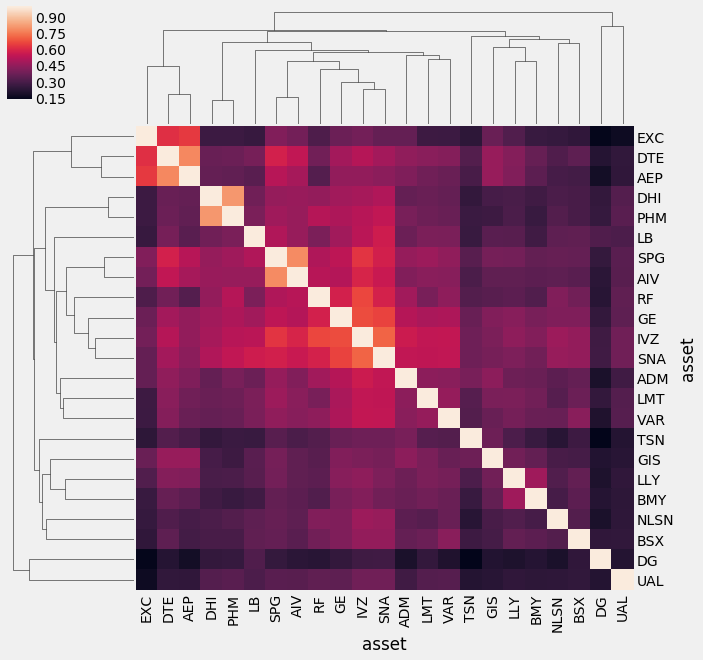

In [7]:
sns.clustermap(returns.corr());